In [67]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bumba5341/advertisingcsv")

print("Path to dataset files:", path)

100%|██████████| 2.26k/2.26k [00:00<00:00, 4.28MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bumba5341/advertisingcsv/versions/1


#
# Load the CSV file (adjust filename if needed)

In [69]:
import pandas as pd
import os

# Path shown in your output
data_path = "/root/.cache/kagglehub/datasets/bumba5341/advertisingcsv/versions/1"
print(os.listdir(data_path))

df = pd.read_csv(os.path.join(data_path, "Advertising.csv"))
print(df.head())

['Advertising.csv']
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


# DataFrame Info

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [72]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Drop Unnamed Column

In [73]:
df = df.drop('Unnamed: 0', axis=1)

In [74]:
df.shape

(200, 4)

In [75]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#  Average sales value

In [77]:
average_sales = df["Sales"].mean()

average_spend = df[["TV", "Radio", "Newspaper"]].mean()
highest_channel = average_spend.idxmax()
print("Average Sales:", round(average_sales, 2))
print("\nAverage Spending by Channel:")

Average Sales: 14.02

Average Spending by Channel:


# Advertising channel with the highest spending

In [78]:
print("\nHighest Spending Channel:", highest_channel)


Highest Spending Channel: TV


# column-by-column statistical analysis focused on distribution, skewness, and outliers


===== TV Analysis =====
count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64
Skewness: -0.07
Outlier count: 0


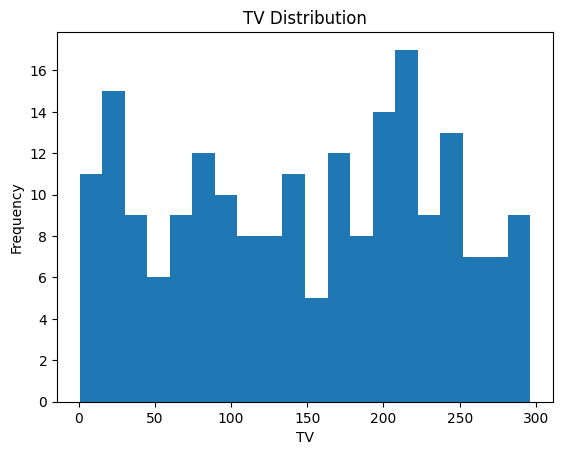

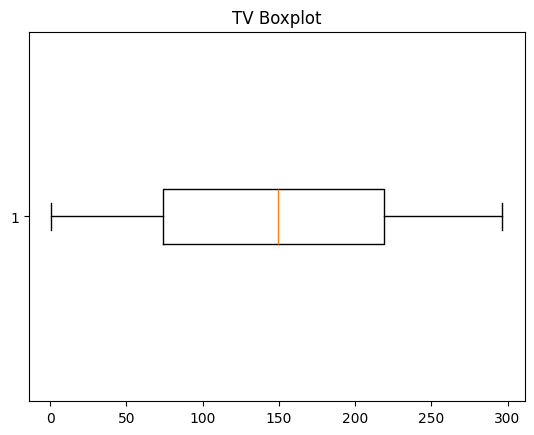


===== Radio Analysis =====
count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: Radio, dtype: float64
Skewness: 0.094
Outlier count: 0


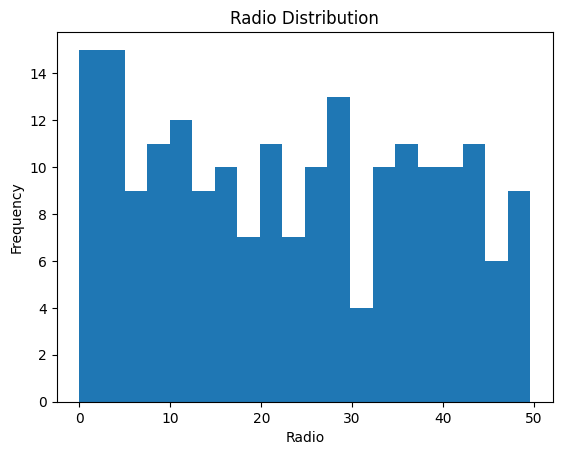

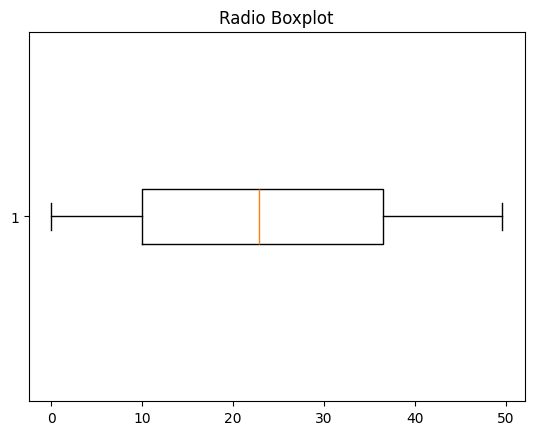


===== Newspaper Analysis =====
count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64
Skewness: 0.895
Outlier count: 2


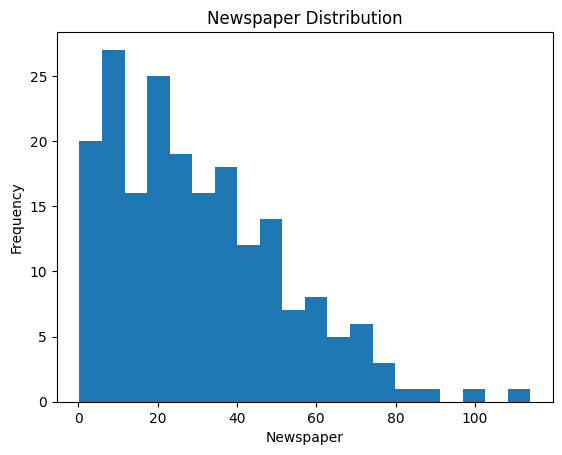

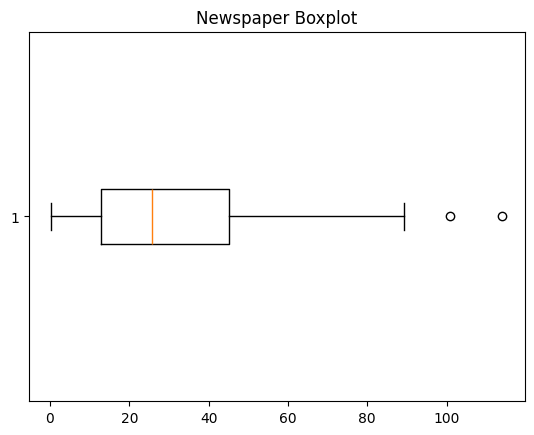


===== Sales Analysis =====
count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64
Skewness: 0.408
Outlier count: 0


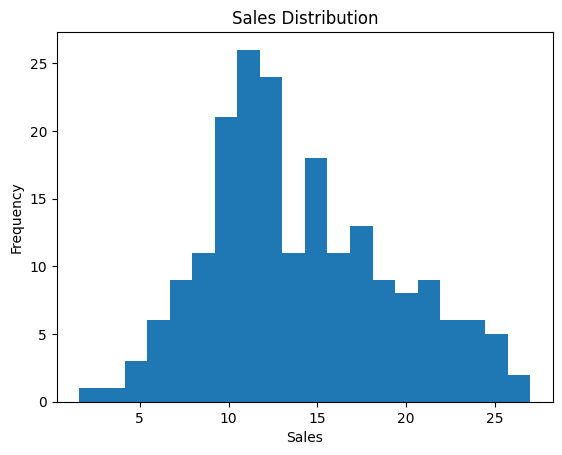

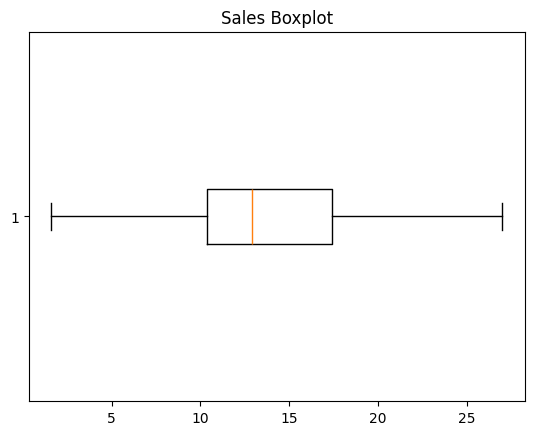

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ["TV", "Radio", "Newspaper", "Sales"]

for col in columns:
    print(f"\n===== {col} Analysis =====")
    print(df[col].describe())
    print("Skewness:", round(df[col].skew(), 3))
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print("Outlier count:", outliers.shape[0])
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    plt.figure()
    plt.boxplot(df[col], vert=False)
    plt.title(f"{col} Boxplot")
    plt.show()

# bivariate analysis focused on correlation and linearity between each advertising channel and Sales


===== TV vs Sales =====
Pearson Correlation: 0.782


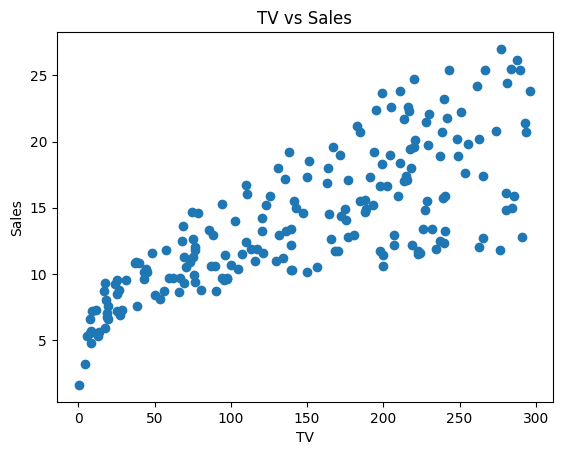


===== Radio vs Sales =====
Pearson Correlation: 0.576


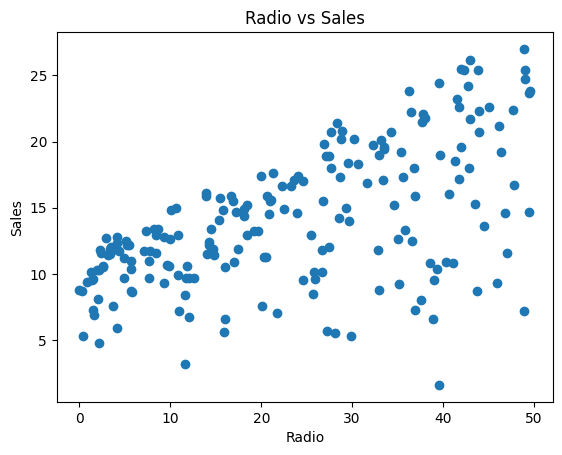


===== Newspaper vs Sales =====
Pearson Correlation: 0.228


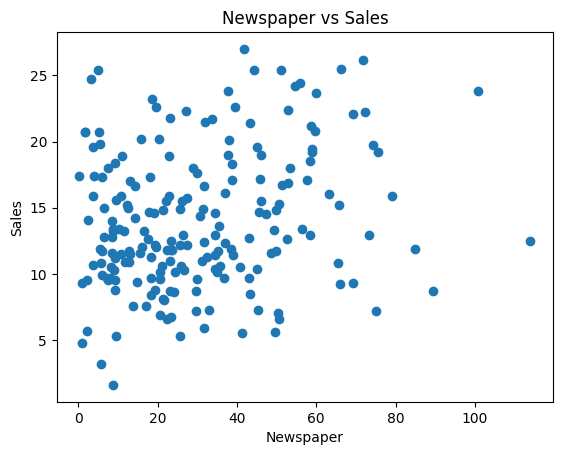

In [80]:
pairs = [("TV", "Sales"), ("Radio", "Sales"), ("Newspaper", "Sales")]

for x, y in pairs:
    print(f"\n===== {x} vs {y} =====")
    corr = df[x].corr(df[y])
    print(f"Pearson Correlation: {corr:.3f}")
    plt.figure()
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs {y}")
    plt.show()

# Multivariate analysis examining the combined effect of TV, Radio, and Newspaper advertising on Sale

In [81]:
import statsmodels.api as sm

X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 19 Jan 2026   Prob (F-statistic):           1.58e-96
Time:                        17:19:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

# Detect & Remove Outliers (IQR Method)

In [82]:
columns = ["TV", "Radio", "Newspaper", "Sales"]

Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Boolean mask for non-outliers
mask = ~(
    (df[columns] < (Q1 - 1.5 * IQR)) |
    (df[columns] > (Q3 + 1.5 * IQR))
).any(axis=1)

# New cleaned DataFrame
df_clean = df[mask].reset_index(drop=True)

In [83]:
print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)
print("Rows removed:", df.shape[0] - df_clean.shape[0])


Original shape: (200, 4)
Cleaned shape: (198, 4)
Rows removed: 2


# Pair Plot

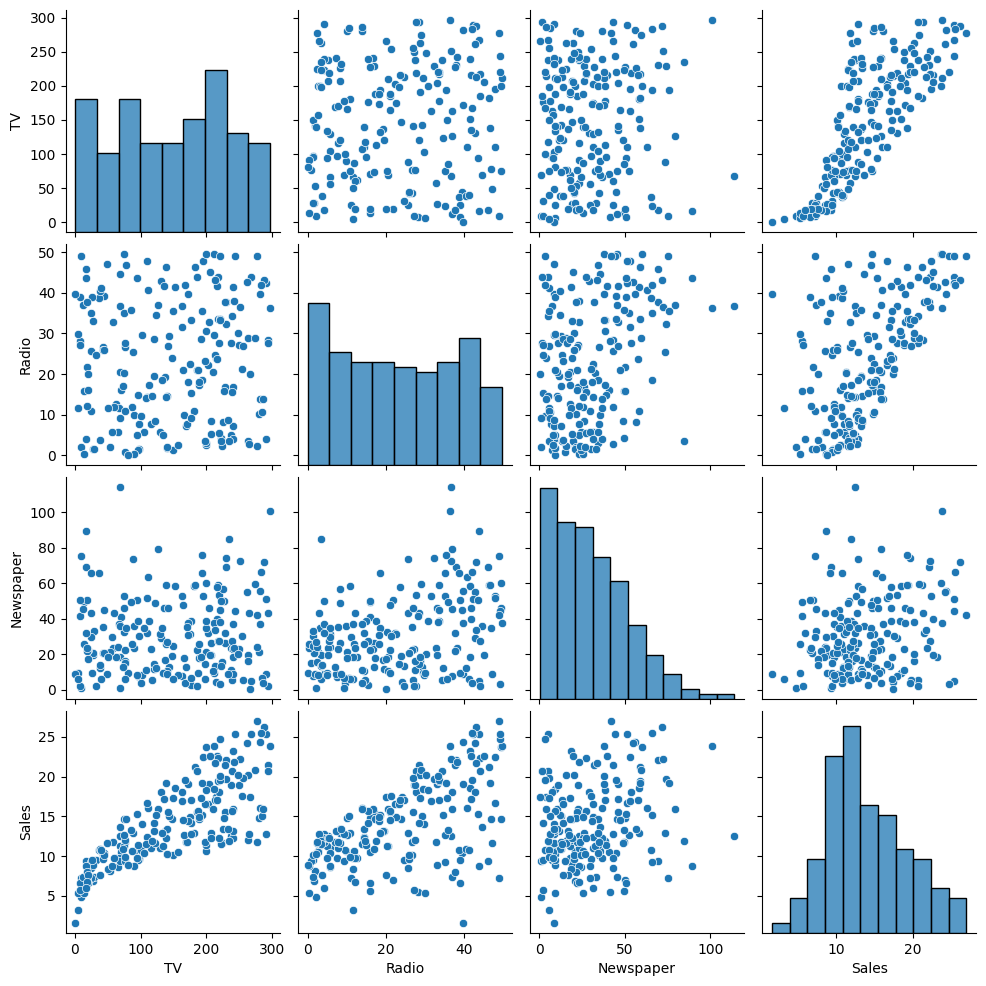

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(
    df,
    diag_kind="hist",
    corner=False
)

plt.show()

# Hist plots

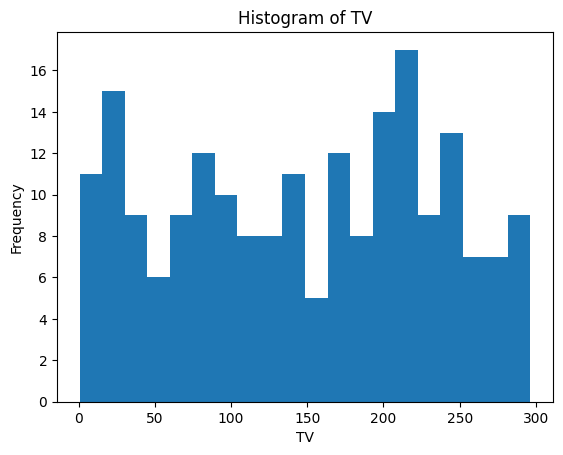

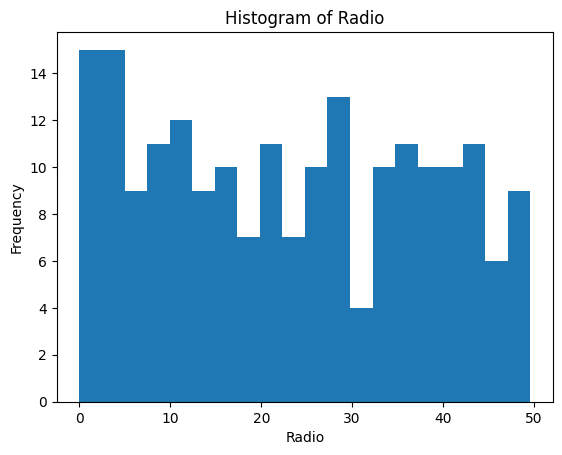

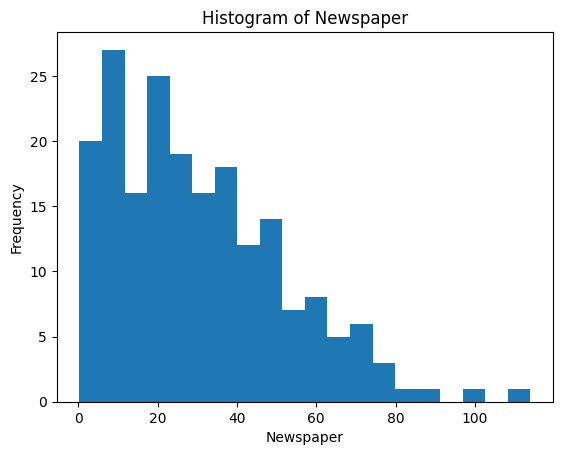

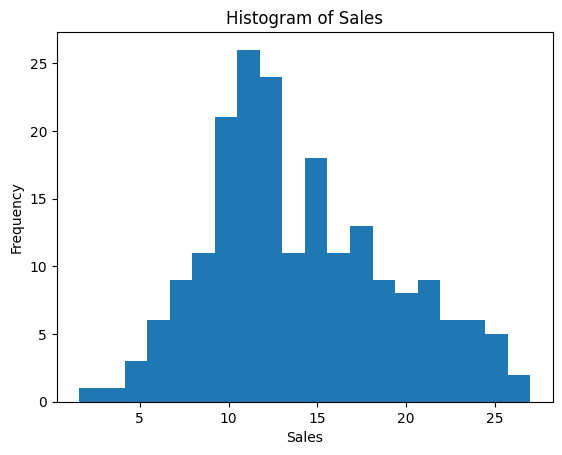

In [85]:
columns = ["TV", "Radio", "Newspaper", "Sales"]

for col in columns:
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Kernel Density Estimation (KDE) plots

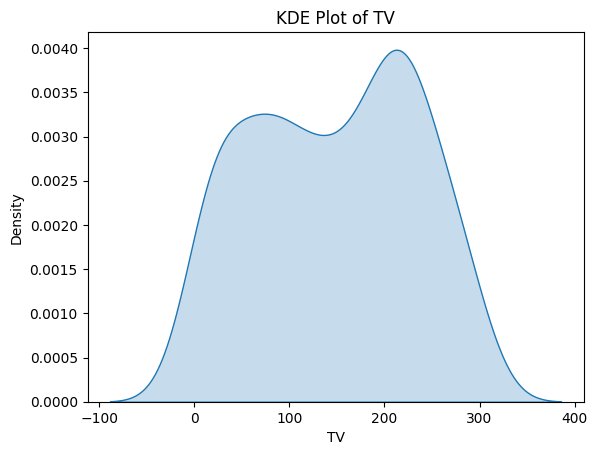

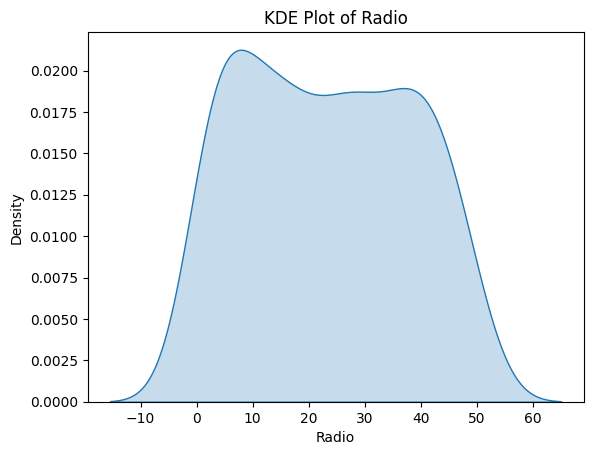

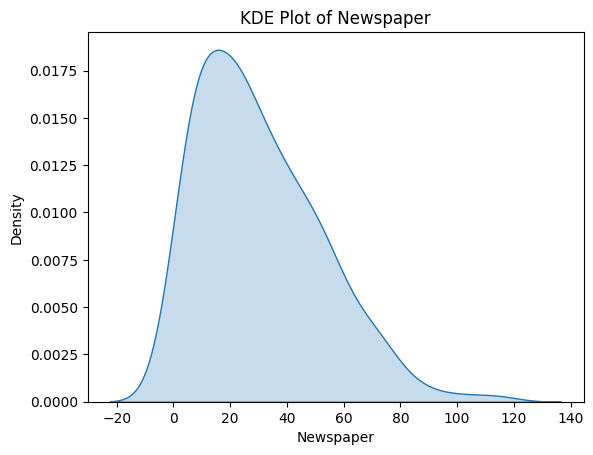

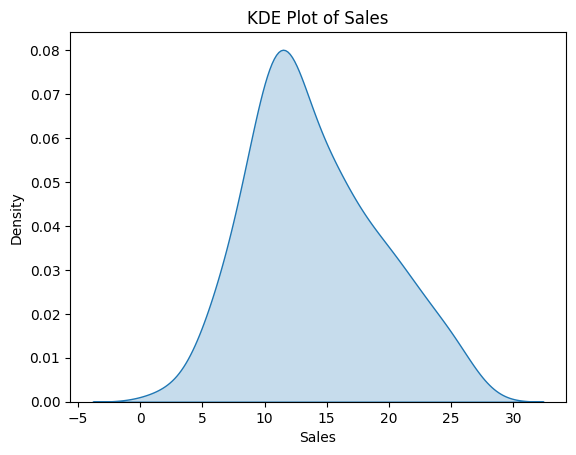

In [86]:
columns = ["TV", "Radio", "Newspaper", "Sales"]

for col in columns:
    plt.figure()
    sns.kdeplot(df[col], fill=True)
    plt.title(f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

# bivariate KDE analysis with Sales

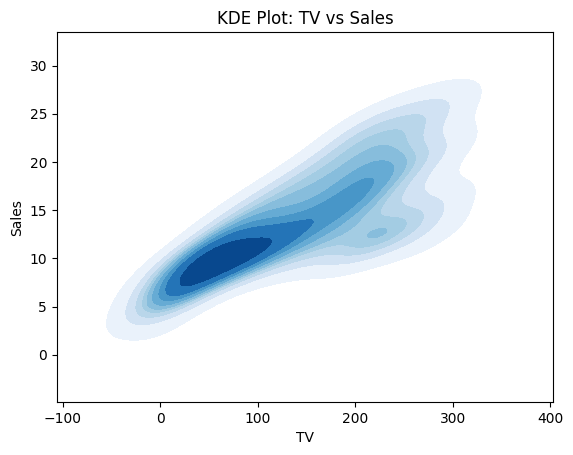

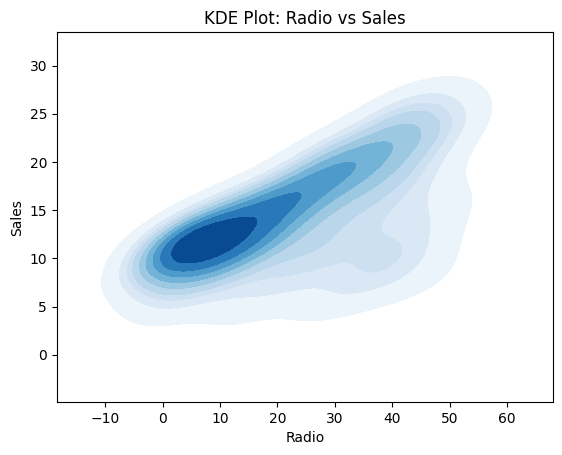

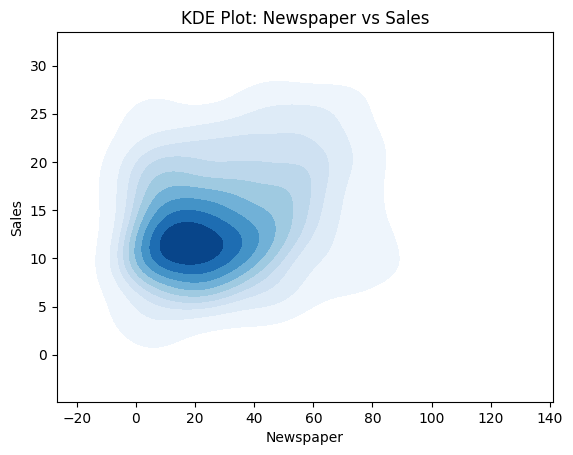

In [87]:
pairs = ["TV", "Radio", "Newspaper"]

for col in pairs:
    plt.figure()
    sns.kdeplot(
        x=df[col],
        y=df["Sales"],
        fill=True,
        cmap="Blues",
        thresh=0.05
    )
    plt.title(f"KDE Plot: {col} vs Sales")
    plt.xlabel(col)
    plt.ylabel("Sales")
    plt.show()

# Correlation Method Pearson

In [88]:
corr_matrix = df.corr(method="pearson")

print(corr_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


In [89]:
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


# Machinelearning Model Building

In [90]:
from sklearn.model_selection import train_test_split

X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [93]:
print(X_train.shape, X_test.shape)

(150, 3) (50, 3)


# Choosing The Best Regression model

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
models = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    "Ridge Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=1.0))
    ]),
    "Lasso Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Lasso(alpha=0.1))
    ]),
    "Random Forest": Pipeline([
        ("model", RandomForestRegressor(
            n_estimators=200,
            random_state=42
        ))
    ])
}


In [92]:
models

{'Linear Regression': Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())]),
 'Ridge Regression': Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge())]),
 'Lasso Regression': Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=0.1))]),
 'Random Forest': Pipeline(steps=[('model',
                  RandomForestRegressor(n_estimators=200, random_state=42))])}

# Evaluate Model Prediction

In [94]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

results = []

for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results.append({
        "Model": name,
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    })

results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)


               Model        R2       MAE      RMSE
3      Random Forest  0.981650  0.576080  0.704491
2   Lasso Regression  0.895087  1.375256  1.684497
1   Ridge Regression  0.893535  1.400372  1.696916
0  Linear Regression  0.893516  1.402312  1.697063


In [95]:
train_results = []

for name, pipeline in models.items():

    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)


    train_results.append({
        "Model": name,
        "Train_R2": r2_score(y_train, y_train_pred),
        "Train_MAE": mean_absolute_error(y_train, y_train_pred),
        "Train_RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred))
    })

train_results_df = pd.DataFrame(train_results).sort_values(
    by="Train_R2", ascending=False
)

print(train_results_df)

               Model  Train_R2  Train_MAE  Train_RMSE
3      Random Forest  0.996547   0.215233    0.304106
0  Linear Regression  0.896645   1.215619    1.663698
1   Ridge Regression  0.896606   1.216458    1.664004
2   Lasso Regression  0.895839   1.220288    1.670170


Among all evaluated models, the Random Forest Regressor delivers the highest predictive accuracy with minimal overfitting, while linear models remain stable and interpretable; therefore, Random Forest is the preferred model for prediction, with linear regression as a reliable baseline for explainability.